<a href="https://colab.research.google.com/github/CubatLin/PaddleOCR/blob/develop/PaddleOCR_inference.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# This is PaddleOCR implementation by Ethan Wu


#### Step 1: Build environment & get necessary modules

In [10]:
def import_data_from_drive(id):
  !wget --save-cookies cookies.txt 'https://docs.google.com/uc?export=download&id='{id} -O- \
  | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1/p' > confirm.txt && wget --content-disposition --load-cookies cookies.txt 'https://docs.google.com/uc?export=download&id='{id}'&confirm='$(<confirm.txt) -q

# get image
import_data_from_drive('1J4QpoPA9nmX9xUipPLkGZ91SLmjqCV4p')

--2023-09-19 03:26:10--  https://docs.google.com/uc?export=download&id=1J4QpoPA9nmX9xUipPLkGZ91SLmjqCV4p
Resolving docs.google.com (docs.google.com)... 142.250.107.113, 142.250.107.138, 142.250.107.100, ...
Connecting to docs.google.com (docs.google.com)|142.250.107.113|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-10-1s-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/n9t1j1p45i5ele0bpctfvhcod69lqfuc/1695093900000/07903891748575983860/*/1J4QpoPA9nmX9xUipPLkGZ91SLmjqCV4p?e=download&uuid=183fcee7-e210-4535-8dc4-6b638fd57349 [following]
--2023-09-19 03:26:11--  https://doc-10-1s-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/n9t1j1p45i5ele0bpctfvhcod69lqfuc/1695093900000/07903891748575983860/*/1J4QpoPA9nmX9xUipPLkGZ91SLmjqCV4p?e=download&uuid=183fcee7-e210-4535-8dc4-6b638fd57349
Resolving doc-10-1s-docs.googleusercontent.com (doc-10-1s-docs.googleusercontent.com)... 142.250.99.132, 2607:f

In [2]:
# get font & install libssl1
!wget -O TaipeiSansTCBeta-Regular.ttf https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_&export=download -q
!wget http://nz2.archive.ubuntu.com/ubuntu/pool/main/o/openssl/libssl1.1_1.1.1f-1ubuntu2.19_amd64.deb -q
!sudo dpkg -i libssl1.1_1.1.1f-1ubuntu2.19_amd64.deb

/bin/bash: line 1: -q: command not found
--2023-09-19 03:22:22--  https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving drive.google.com (drive.google.com)... 74.125.197.102, 74.125.197.101, 74.125.197.139, ...
Connecting to drive.google.com (drive.google.com)|74.125.197.102|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-0k-9o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/j18jmhht1urs93d1p86a1c1vh94ekmsg/1695093675000/02847987870453524430/*/1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_?uuid=d7f73b53-880c-4026-ab1c-ab90dc93d91b [following]
--2023-09-19 03:22:23--  https://doc-0k-9o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/j18jmhht1urs93d1p86a1c1vh94ekmsg/1695093675000/02847987870453524430/*/1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_?uuid=d7f73b53-880c-4026-ab1c-ab90dc93d91b
Resolving doc-0k-9o-docs.googleusercontent.com (doc-0k-9o-docs.googleusercontent.com)... 142.250.99.132, 26

In [3]:
!pip install "paddleocr>=2.0.6" -q # 2.0.6 version is recommended
!pip install paddlepaddle -q
!pip install opencc-python-reimplemented -q

# IF GPU:
# !pip install paddlepaddle-gpu -q # gpu

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 465.7/465.7 kB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 908.3/908.3 kB 9.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 299.2/299.2 kB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 20.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 45.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.9/60.9 MB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.1/67.1 MB 7.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.9/8.9 MB 70.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 67.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 82.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.3/88.3 kB 8.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

#### Step 2: import libraries

In [23]:
from PIL import Image
from paddleocr import PaddleOCR, draw_ocr
from opencc import OpenCC
import matplotlib.pyplot as plt
from google.colab import files

In [13]:
### config ###
img_path = '/content/公文.jpg'  # image path
save_path = 'ocr_result.jpg'  # save ocr result
font_path = '/content/TaipeiSansTCBeta-Regular.ttf'  # font path

ocr = PaddleOCR(use_angle_cls=True, lang="ch")
cc = OpenCC('s2tw')

[2023/09/19 03:26:36] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='/root/.paddleocr/whl/det/ch/ch_PP-OCRv4_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='/root/.paddleocr/whl/rec/ch/ch_PP-OCRv4_rec_infer', rec_image_inverse=True, rec_image_shape='3, 48, 320', rec_batch_num=6, max_text_length=25, rec_char_dict_path='

In [18]:
def annotate_and_save(img_path, result, save_path, font_path):
    """
    img_path (str): 原始圖像的檔案路徑。
    result (list): OCR的結果。
    save_path (str): 標注後的圖像要保存的檔案路徑。
    font_path (str): 自定義字體的檔案路徑。
    """
    # open image & get single result
    image = Image.open(img_path).convert('RGB')
    single_results = result[0]

    # extract ocr features
    boxes = [line[0] for line in single_results]
    txts = [cc.convert(str(line[1][0])) for line in single_results]
    scores = [line[1][1] for line in single_results]

    # pin image by draw_ocr function
    im_show = draw_ocr(image, boxes, txts, scores, font_path=font_path)

    # convert numpy array to PIL image, then save
    im_show = Image.fromarray(im_show)
    im_show.save(save_path, quality=95)

#### Step 3: run and show result

In [19]:
def main():
    ocr_result = ocr.ocr(img_path, cls=False) # files are not all in horizontal format if cls=True.
    annotate_and_save(img_path, ocr_result, save_path, font_path)

In [20]:
main()

[2023/09/19 03:28:00] ppocr DEBUG: dt_boxes num : 35, elapsed : 1.0163743495941162
[2023/09/19 03:28:11] ppocr DEBUG: rec_res num  : 35, elapsed : 11.108288764953613


#### Step 4: check & download result

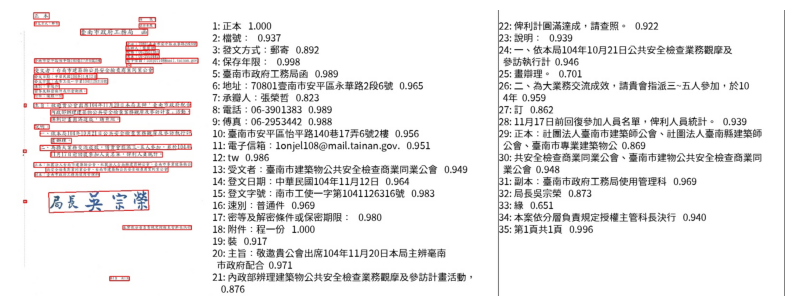

In [25]:
def resize_and_show_image(scale_factor, path):
    image = Image.open(path)
    width, height = image.size

    # 設定放大比例
    scale_factor = 3
    new_width = int(width * scale_factor)
    new_height = int(height * scale_factor)

    # 按比例放大圖像
    image_resized = image.resize((new_width, new_height), Image.ANTIALIAS)

    plt.figure(figsize=(10, 10))
    plt.imshow(image_resized)
    plt.axis('off')  # 不顯示坐標軸
    plt.show()

resize_and_show_image(scale_factor=3, path=save_path)

In [24]:
# download ocr_result.jpg
files.download(save_path)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Referenece
* [OCR official multi_language](https://github.com/Mushroomcat9998/PaddleOCR/blob/main/doc/doc_en/multi_languages_en.md)
* [自定義數據](https://zhuanlan.zhihu.com/p/523972865)
* [載欲訓練模型](https://gitee.com/paddlepaddle/PaddleOCR/blob/release/2.5/doc/doc_ch/models_list.md#https://gitee.com/link?target=https%3A%2F%2Fpaddleocr.bj.bcebos.com%2FPP-OCRv3%2Fmultilingual%2Fchinese_cht_PP-OCRv3_rec_infer.tar)
* [libssl失敗處理方式](https://stackoverflow.com/questions/72133316/libssl-so-1-1-cannot-open-shared-object-file-no-such-file-or-directory)